In [35]:
import pandas as pd
import numpy as np

In [36]:
df=pd.read_csv('train.csv')

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [39]:
df['Family']=df['SibSp']+df['Parch']

In [40]:
df=df[['Age','Fare','Family','Survived']]

In [41]:
df.isnull().mean()

Age         0.198653
Fare        0.000000
Family      0.000000
Survived    0.000000
dtype: float64

In [42]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [46]:
x_train.shape,y_train.shape

((712, 3), (179, 3))

In [47]:
mean_age=x_train['Age'].mean()
median_age=x_train["Age"].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [48]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['Fare_median']=df['Fare'].fillna(median_fare)
x_train['Fare_mean']=df['Fare'].fillna(mean_fare)

In [50]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
432,42.0,26.000,1,42.0,42.000000,26.000,26.000
486,35.0,90.000,1,35.0,35.000000,90.000,90.000
151,22.0,66.600,1,22.0,22.000000,66.600,66.600
619,26.0,10.500,0,26.0,26.000000,10.500,10.500
667,NaN,7.775,0,28.0,29.498846,7.775,7.775


In [54]:
print(x_train['Age'].var())
print(x_train['Age_mean'].var())
print(x_train['Age_median'].var())
print("***************")

print(x_train['Fare'].var())
print(x_train['Fare_mean'].var())
print(x_train['Fare_median'].var())

210.2517072477435
168.85193366872227
169.20731007048155
***************
2700.831981118079
2700.831981118079
2700.831981118079


In [55]:
import matplotlib.pyplot as plt

<Axes: ylabel='Density'>

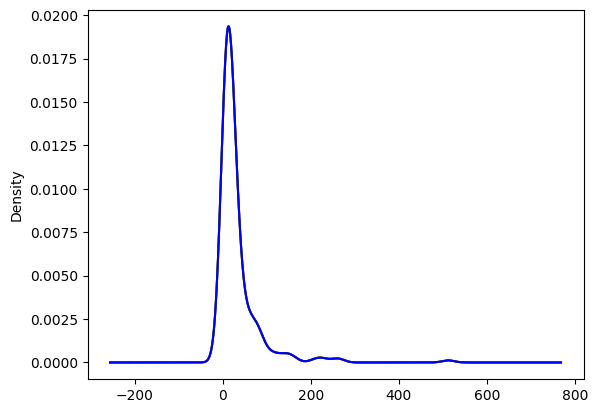

In [59]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')
x_train['Fare_median'].plot(kind='kde',ax=ax,color='blue')


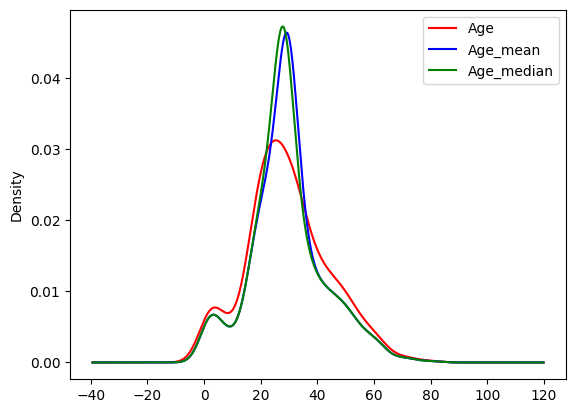

In [66]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax,color='red')
x_train['Age_mean'].plot(kind='kde',ax=ax,color='blue')
x_train['Age_median'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


In [67]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,71.580633,-6.993325,210.251707,210.251707,71.580633,71.580633
Fare,71.580633,2700.831981,18.495747,61.261919,57.485994,2700.831981,2700.831981
Family,-6.993325,18.495747,2.830892,-5.587710,-5.616299,18.495747,18.495747
Age_median,210.251707,61.261919,-5.587710,169.207310,168.851934,61.261919,61.261919
Age_mean,210.251707,57.485994,-5.616299,168.851934,168.851934,57.485994,57.485994
Fare_median,71.580633,2700.831981,18.495747,61.261919,57.485994,2700.831981,2700.831981
Fare_mean,71.580633,2700.831981,18.495747,61.261919,57.485994,2700.831981,2700.831981


<Axes: >

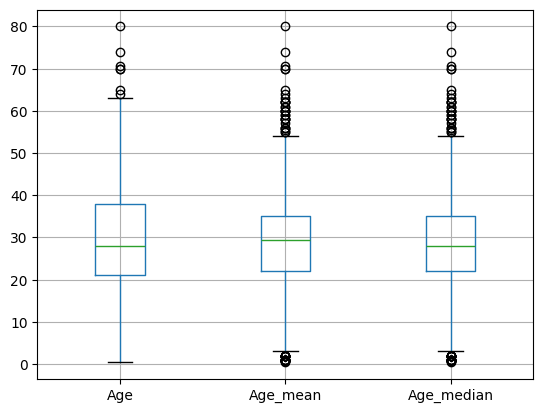

In [69]:
x_train[['Age','Age_mean','Age_median']].boxplot()

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [71]:
from sklearn.impute import SimpleImputer

In [72]:
impute1=SimpleImputer(strategy='median')
impute2=SimpleImputer(strategy='mean')

In [73]:
from sklearn.compose import ColumnTransformer

In [74]:
trf1=ColumnTransformer([
    ('imputer1',impute1,['Age']),
    ('imputer2',impute2,['Fare'])
],remainder='passthrough')

In [75]:
trf1.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])